In [4]:
import pandas as pd
import numpy as np

# 导入matplotlib.pyplot绘图库，其中plt.plot()是最常用的绘图函数之一
import matplotlib.pyplot as plt 

import seaborn as sns


plt.rcParams["font.sans-serif"]=["Microsoft YaHei"] #设置字体。如果不设置，中文会乱码。这里采用微软雅黑'Microsoft YaHei'，如果显示不正常，也可以使用黑体'SimHei'或者宋体'SimSun'等
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 绘图使用'svg'后端：svg是矢量格式，可以任意缩放均保持清晰，各种屏幕的显示良好。
%config InlineBackend.figure_formats = ['svg']

from factor_analyzer import FactorAnalyzer



In [5]:
# 读取和简单查看数据
df_full = pd.read_csv("data/bfi.csv")
df_full.head()

,rownames,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [6]:
# 把进行因子分析的列选出来
df = df_full.drop(["rownames", "gender", "education", "age"], axis=1)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [7]:

# 创建 FactorAnalyzer 对象,指定要提取的因子数量
fa = FactorAnalyzer(n_factors=5, rotation="varimax")

# 拟合因子分析模型
fa.fit(df)

# 获取成分矩阵(因子负荷矩阵)
component_matrix = fa.loadings_


# 以下都是格式和命名
component_df = pd.DataFrame(component_matrix.round(4))
component_df.index = df.columns
component_df.columns = [
    "Factor " + str(i + 1) for i in range(len(component_df.columns))
] # 常用知识：列表推导式
print("成分矩阵:")
component_df.tail()

成分矩阵:


,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
O1,0.0051,0.2166,0.1192,0.0656,0.4951
O2,0.1889,0.0041,-0.0973,0.0868,-0.4518
O3,0.0250,0.2995,0.0840,0.1322,0.5837
O4,0.2294,-0.1824,-0.0161,0.1528,0.3721
O5,0.0957,-0.0073,-0.0568,-0.0157,-0.5320


In [8]:
# 命名：因子可以有含义

factor = component_df["Factor 1"]
factor[np.abs(factor) > 0.4]


N1    0.7669
N2    0.7462
N3    0.7318
N4    0.5817
N5    0.5382
Name: Factor 1, dtype: float64

In [9]:
# 因子1和N系列问题，高度相关
# N表示”神经质”(Neuroticism)

In [10]:
component_df.rename({"Factor 1": "神经质因子"}, inplace=True, axis=1)
component_df.head()

,神经质因子,Factor 2,Factor 3,Factor 4,Factor 5
A1,0.1215,0.0359,0.0235,-0.4058,-0.0817
A2,0.0295,0.2036,0.1435,0.6127,0.0679
A3,0.0059,0.3155,0.1065,0.6370,0.0593
A4,-0.0588,0.1803,0.2296,0.4248,-0.1053
A5,-0.1111,0.3895,0.0893,0.5357,0.0621


In [11]:
# 如此类推，可以把所有因子都命名一次！

factor = component_df["Factor 2"]
factor[np.abs(factor) > 0.4]

E1   -0.5733
E2   -0.6782
E3    0.5354
E4    0.6420
E5    0.4982
Name: Factor 2, dtype: float64

In [12]:
component_df.rename({"Factor 2": "外向性因子"}, inplace=True, axis=1)
component_df.head()

,神经质因子,外向性因子,Factor 3,Factor 4,Factor 5
A1,0.1215,0.0359,0.0235,-0.4058,-0.0817
A2,0.0295,0.2036,0.1435,0.6127,0.0679
A3,0.0059,0.3155,0.1065,0.6370,0.0593
A4,-0.0588,0.1803,0.2296,0.4248,-0.1053
A5,-0.1111,0.3895,0.0893,0.5357,0.0621


In [13]:
factor = component_df["Factor 3"]
factor[np.abs(factor) > 0.4]

C1    0.5312
C2    0.6467
C3    0.5474
C4   -0.6051
C5   -0.5526
Name: Factor 3, dtype: float64

In [14]:
component_df.rename({"Factor 3": "尽责性因子"}, inplace=True, axis=1)
component_df.head()

,神经质因子,外向性因子,尽责性因子,Factor 4,Factor 5
A1,0.1215,0.0359,0.0235,-0.4058,-0.0817
A2,0.0295,0.2036,0.1435,0.6127,0.0679
A3,0.0059,0.3155,0.1065,0.6370,0.0593
A4,-0.0588,0.1803,0.2296,0.4248,-0.1053
A5,-0.1111,0.3895,0.0893,0.5357,0.0621


In [15]:
factor = component_df["Factor 4"]
factor[np.abs(factor) > 0.4]

A1   -0.4058
A2    0.6127
A3    0.6370
A4    0.4248
A5    0.5357
Name: Factor 4, dtype: float64

In [16]:
component_df.rename({"Factor 4": "宜人性因子"}, inplace=True, axis=1)
component_df.head()

,神经质因子,外向性因子,尽责性因子,宜人性因子,Factor 5
A1,0.1215,0.0359,0.0235,-0.4058,-0.0817
A2,0.0295,0.2036,0.1435,0.6127,0.0679
A3,0.0059,0.3155,0.1065,0.6370,0.0593
A4,-0.0588,0.1803,0.2296,0.4248,-0.1053
A5,-0.1111,0.3895,0.0893,0.5357,0.0621


In [17]:
factor = component_df["Factor 5"]
factor[np.abs(factor) > 0.4]

O1    0.4951
O2   -0.4518
O3    0.5837
O5   -0.5320
Name: Factor 5, dtype: float64

In [18]:
component_df.rename({"Factor 5": "开放性因子"}, inplace=True, axis=1)
component_df.head()

,神经质因子,外向性因子,尽责性因子,宜人性因子,开放性因子
A1,0.1215,0.0359,0.0235,-0.4058,-0.0817
A2,0.0295,0.2036,0.1435,0.6127,0.0679
A3,0.0059,0.3155,0.1065,0.6370,0.0593
A4,-0.0588,0.1803,0.2296,0.4248,-0.1053
A5,-0.1111,0.3895,0.0893,0.5357,0.0621


In [19]:
# 得到了因子和变量的关系，下一步，计算因子得分：原始数据的浓缩版！

# 计算因子得分:np.dot 矩阵点乘
factor_scores = np.dot(df, component_matrix)
factor_scores[:5] # 查看前5行

array([[14.71352866,  5.79893032,  2.94986209,  9.98670892,  1.24775865],
       [15.87247405,  9.6519841 ,  6.19737554, 12.45583541,  5.67490637],
       [17.71431552,  8.24005691,  7.57354016, 10.48520448,  6.74800702],
       [15.0422389 ,  6.74854213,  4.35994118, 11.67428046,  2.75110718],
       [13.91759025,  8.98399597,  7.9199173 , 11.34408691,  4.42213342]])

In [20]:
# 把上述因子得分，转为df，比较容易理解
import pandas as pd

# pd.DataFrame()是构造DataFrame的函数，数据来源可以是一个矩阵，指定列名columns
factor_scores_df = pd.DataFrame(factor_scores, columns=component_df.columns)
factor_scores_df.round(3)

,神经质因子,外向性因子,尽责性因子,宜人性因子,开放性因子
0,14.714,5.799,2.950,9.987,1.248
1,15.872,9.652,6.197,12.456,5.675
2,17.714,8.240,7.574,10.485,6.748
3,15.042,6.749,4.360,11.674,2.751
4,13.918,8.984,7.920,11.344,4.422
...,...,...,...,...,...
2795,NaN,NaN,NaN,NaN,NaN
2796,NaN,NaN,NaN,NaN,NaN
2797,12.529,11.679,11.734,11.892,9.353
2798,19.522,8.127,7.190,7.444,7.803


In [21]:
# 把原始数据 df_full中的个人特征添加到因子得分矩阵
factor_scores_df = pd.concat(
    [factor_scores_df, df_full[["gender", "education", "age"]]], axis=1
)
factor_scores_df.head()

,神经质因子,外向性因子,尽责性因子,宜人性因子,开放性因子,gender,education,age
0,14.713529,5.798930,2.949862,9.986709,1.247759,1,NaN,16
1,15.872474,9.651984,6.197376,12.455835,5.674906,2,NaN,18
2,17.714316,8.240057,7.573540,10.485204,6.748007,2,NaN,17
3,15.042239,6.748542,4.359941,11.674280,2.751107,2,NaN,17
4,13.917590,8.983996,7.919917,11.344087,4.422133,1,NaN,17


In [22]:
# 去掉任何有缺失值的样本，原地修改
factor_scores_df.dropna(inplace=True)

In [23]:
# 注意：以下这些检验都可以用线性回归完成，这是演示最基本的方法

# 3号因子（用你取的名称），在男性和女性之间有没有显著差异？
# 因子：连续变量。问2个连续变量之间有没有差异：T检验

from scipy import stats
import numpy as np

# 两组示例数据
group1 = factor_scores_df[factor_scores_df.gender == 1]['尽责性因子']
group2 = factor_scores_df[factor_scores_df.gender == 2]['尽责性因子']
group1

7        2.549356
10       8.129695
14       9.733333
22       4.478263
24      12.973882
          ...    
2775    11.336749
2776    15.643764
2780     7.418988
2787    11.582565
2798     7.190181
Name: 尽责性因子, Length: 735, dtype: float64

In [24]:

# 执行双样本t检验
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"样本1的均值: {group1.mean():.2f}，样本2的均值: {group2.mean():.2f}")
print(f"t统计量: {t_stat:.2f}, p值: {p_value:.3f}")

样本1的均值: 7.97，样本2的均值: 8.69
t统计量: -4.56, p值: 0.000


c:\Users\lee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


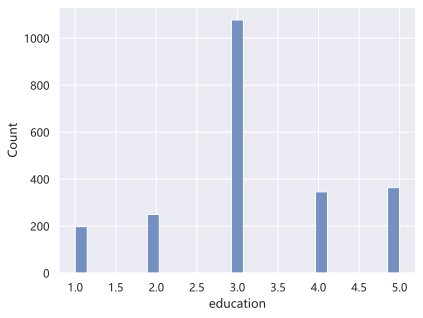

In [25]:
# 1号因子（用你取的名称），会因为教育程度的不同而不同吗？
# 这里涉及一个更深入的问题：数据中的教育程度是连续变量，还是定序变量（有顺序的分类变量）

# 如果教育是连续变量，可能是以年数来度量，会是一个0到10几的数字
# 如果教育是定序变量，可能会是0、1、2、3、4这样的数据，表示没上学，小学、初中、高中，大学等等
# 数据中没明确说，那么绘制教育的分布
sns.histplot(factor_scores_df['education']);

In [26]:
# 结果看，1到5，应该是个定序变量，即学历程度。
# 因子：连续变量。教育程度：定序变量（有顺序的分类变量）：方差分析

import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns


# 定义模型，因变量是神经质因子，数值型变量默认会被认为连续变量
# 用函数C()，在计算的时候把教育视为分类变量
# 你可以自己尝试不转换看看
model = ols("神经质因子 ~ C(education)", data=factor_scores_df).fit()

# 执行ANOVA
anova_results = sm.stats.anova_lm(model, typ=1)

anova_results.round(3)


,df,sum_sq,mean_sq,F,PR(>F)
C(education),4.0,157.256,39.314,1.747,0.137
Residual,2231.0,50198.843,22.501,NaN,NaN


In [27]:
# P值>0.05，因此不同教育水平的人神经质的程度差不多

c:\Users\lee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


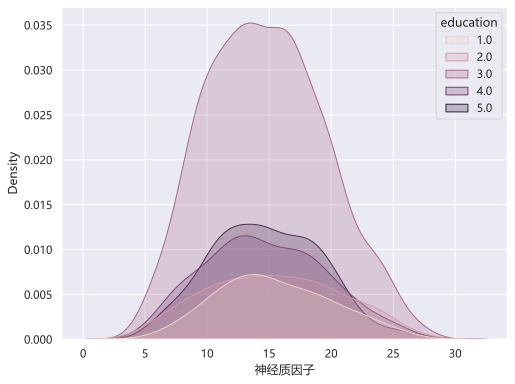

In [28]:
# 绘制核密度图，可以进一步确认
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6))
sns.kdeplot(data=factor_scores_df, x="神经质因子", hue="education", fill=True)

plt.show()

In [29]:
# 5号因子（用你取的名称），如何随着年龄而改变？
# 连续变量 vs 连续变量：回归

# 先尝试一元回归

X = factor_scores_df['age']

y = factor_scores_df['开放性因子']

model = sm.OLS(y, X)
result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  开放性因子   R-squared (uncentered):                   0.789
Model:                            OLS   Adj. R-squared (uncentered):              0.789
Method:                 Least Squares   F-statistic:                              8377.
Date:                Thu, 30 May 2024   Prob (F-statistic):                        0.00
Time:                        14:39:25   Log-Likelihood:                         -5752.6
No. Observations:                2236   AIC:                                  1.151e+04
Df Residuals:                    2235   BIC:                                  1.151e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [30]:
# t值很大，p约等于0，非常显著
# 考虑多元回归

X = factor_scores_df.drop(['开放性因子'], axis=1)

y = factor_scores_df['开放性因子']

model = sm.OLS(y, X)
result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  开放性因子   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              3175.
Date:                Thu, 30 May 2024   Prob (F-statistic):                        0.00
Time:                        14:39:25   Log-Likelihood:                         -4816.3
No. Observations:                2236   AIC:                                      9647.
Df Residuals:                    2229   BIC:                                      9687.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
# 结论也是类似，看age的那一行